<h1>Analysing the connection between top universities and Nobel Prize Laureates</h1>
<h2>Coding 3 - Final Project</h2>
<h2>Karola Takács and Kata Süle</h2>
<h3>30th March 2021</h3>

<h1><code style="background:indigo;color:white">Executive Summary</h1></code>
<hr>

The motivation for this project was to find out whether there is a connection between top ranked universities and Nobel Prize Laureates. To investigate this issue we combined data from two sources: a Kaggle dataset containing the ranking of Times Higher Education and API data about Nobel Prize Laureates. After joining the above-mentioned two datasets we were able to answer the following six questions:
1. Does average age of Laureates differ for Nobel Prize categories?
2. What is the distribution of prize amount by category?
3. What is the relationship between a university's total score and its student-staff ratio?
4. Is there a positive relationship between total score and number of Nobel Prize Laureates?
5. Which are the top 5 universities based on awarded prize amount?
6. Is the age at award distribution different for those Laureates who worked in their home countries as opposed to who did not?

Our findings indicate that the average age of Laureates is the highest in the Economic Sciences category and that the Literature category stands out in terms of average awarded prize amount. Furthermore, we found a negative association between a university's total score and its student-staff ratio. As for the connection between a university's total score and the number of Nobel Prize Laureates affiliated with it we found a nonlinear but positive relationship. In addition, up until 2020 Laureates of Harvard University won the highest prize amount in total. Lastly, we found that Laureates who left their home countries were awarded at higher ages compared to those who stayed.

<h1><code style="background:indigo;color:white">Setup</h1></code>
<hr>

In [1]:
# import libraries and set working directory
import pandas as pd
import numpy as np
import requests
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir(r'C:\CEU\Winter_Term\Coding_3\Project')

In [2]:
# check available styles for plots
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
# set style for plots
plt.style.use('seaborn-notebook')

<h1><code style="background:indigo;color:white">Tabular Data</h1></code>
<hr>

## 1. Description of dataset
* ##### Source:
The dataset was downloaded from [Kaggle](https://www.kaggle.com/maxplattner/university-rankings-the-by-subject-cwur?select=THE.csvm).
* ##### About:
[Times Higher Education](https://www.timeshighereducation.com/world-university-rankings/about-the-times-higher-education-world-university-rankings) creates global university rankings for each year to assess the performance of universities and help prospective students with their decisions. The universities are ranked based on scores calculated from multiple features. The total score is a weighted average of 13 indicators which are combined into 5 main scores. Our dataset contains these scores and some extra features which add up to 15 variables in total. The dataset has data for 10 consecutive years, from 2011 to 2020. This means that there are 7342 observations in total.
* ##### Variables:
|Variable Name|Type|Description|
|:-:|:-:|:-|
|world_rank|Qualitative, ordinal|Ranking of university in a given year.|
|university_name|Qualitative, nominal|Name of university.|
|country|Qualitative, nominal|Name of country where university is located.|
|teaching_score|Quantitative, ratio|University's score on learning environment, has 30% weight in the total score.|
|international_score|Quantitative, ratio|University's score on international outlook meaning the ratio of international students, staff and research. Has 7.5% weight in the total score.|
|research_score|Quantitative, ratio|University's score on research meaning its volume, the income generated by it as well as the university's reputation in the field. Has 30% weight in the total score.|
|citations_score|Quantitative, ratio|University's score on the degree of influence its research has, has 30% weight in the total score.|
|income_score|Quantitative, ratio|University's score on the extent to which businesses are willing to pay for its research and a university’s ability to attract funding. Has 2.5% weight in the total score.|
|total_score|Quantitative, ratio|University's total score calculated from the above mentioned 5 scores.|
|num_students|Quantitative, ratio|Number of students who study at the university.|
|student_staff_ratio|Quantitative, ratio|The number of students divided by the number of staff.|
|international_students|Quantitative, ratio|The proportion of international students who study at the university.|
|year|Quantitative, interval|The year when the ranking was published.|
|female_percentage|Quantitative, ratio|The proportion of female students who study at the university.|
|male_percentage|Quantitative, ratio|The proportion of male students who study at the university.|

## 2. Exploratory Data Analysis

##### Import Data

In [23]:
data = pd.read_csv('universities.csv')

In [24]:
# rename some variables
data.rename(columns={'teaching': 'teaching_score', 'international': 'international_score', 'research': 'research_score', 'citations': 'citations_score', 'income': 'income_score'}, inplace=True)

In [25]:
data.head(3)

,world_rank,university_name,country,teaching_score,international_score,research_score,citations_score,income_score,total_score,num_students,student_staff_ratio,international_students,year,female_percentage,male_percentage
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,2011,NaN,NaN
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,0.27,2011,0.33,0.67
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,2011,0.37,0.63


##### Check Data Types

In [26]:
# checking whether the datatypes are correct
data.dtypes

world_rank                  int64
university_name            object
country                    object
teaching_score            float64
international_score       float64
research_score            float64
citations_score           float64
income_score              float64
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students    float64
year                        int64
female_percentage         float64
male_percentage           float64
dtype: object

All the data types are correct so no transformation is needed.

##### Check for Duplicates and Missing Values

In [27]:
# check if there are duplicates
data.duplicated().sum()

0

There are no duplicates in the data.

In [28]:
# check missing values in each column
data.isnull().sum()

world_rank                   0
university_name              0
country                      0
teaching_score               0
international_score          9
research_score               0
citations_score              0
income_score               218
total_score               5338
num_students                59
student_staff_ratio         59
international_students      72
year                         0
female_percentage          469
male_percentage            469
dtype: int64

Lot less observations are present for the total_score measure, which is available only for 2004 universities, which is strange given that for the 5 variables it is calculated from, there are values in at least 7124 cases (we knew this from summary stats). Since we know from the dataset description how the total_score is calculated, we decided to compute it for the missing ones. Prior to that the missing values for international_score and income_score were dropped.

In [29]:
# drop observations where international score or income score is missing
data = data.dropna(subset=['international_score', 'income_score'])

In [30]:
# calculate total score where it is missing but we have the other scores to compute it from
data['total_score'] = np.where(data['total_score'].isnull() == True,0.3*data['teaching_score']+0.075*data['international_score']+0.3*data['research_score']+0.3*data['citations_score']+0.025*data['income_score'], data['total_score'])

As for those observations where the number of students, the student-staff ratio or the international students variables had missing values we decided to impute these with their respective means, plus add flags for these observations.

In [31]:
# impute num_students, student_staff_ratio and international_students with mean because around 50 values are missing for each
# plus add flags for these observations
data['f_num_students'] = np.where(data['num_students'].isnull() == True, 1, 0)
data['f_student_staff_ratio'] = np.where(data['student_staff_ratio'].isnull() == True, 1, 0)
data['f_international_students'] = np.where(data['international_students'].isnull() == True, 1, 0)

In [32]:
# impute with mean
# mean is calculated by year
cols = ['num_students', 'student_staff_ratio', 'international_students']
years = range(2011,2021)

for i in cols:
    for j in years:
        mean = data[data['year']==j][i].mean()
        data[i] = np.where((data[i].isnull() == True) & (data['year'] == j), mean, data[i])

We decided not to impute or drop the observations where female or male ratio was missing because there were a lot of them and we do not intend to use them when answering our questions.

##### Describe Data

In [33]:
# summary statistics of numeric variables
to_drop = set(data.columns) - {'f_num_students', 'f_student_staff_ratio', 'f_international_students'}
data[list(to_drop)].describe()

,male_percentage,teaching_score,num_students,citations_score,year,international_students,total_score,international_score,world_rank,student_staff_ratio,research_score,income_score,female_percentage
count,6685.000000,7119.000000,7.119000e+03,7119.000000,7119.000000,7119.000000,7119.000000,7119.000000,7119.000000,7119.000000,7119.000000,7119.000000,6685.000000
mean,0.506667,31.684843,2.421193e+04,52.553125,2017.149881,0.130480,38.606496,49.091530,468.490097,19.067278,28.234218,47.036452,0.493333
std,0.118230,15.945800,3.911498e+04,27.195640,2.488611,0.114564,17.805114,23.148142,316.808919,20.016521,19.770307,18.695089,0.118230
min,0.050000,8.200000,4.620000e+02,0.700000,2011.000000,0.000000,8.222500,7.100000,1.000000,0.600000,0.800000,0.000000,0.000000
25%,0.430000,20.100000,1.155450e+04,28.750000,2016.000000,0.040000,24.327500,29.300000,192.000000,12.300000,13.200000,34.800000,0.440000
50%,0.480000,27.100000,1.959900e+04,53.300000,2018.000000,0.100000,36.550000,46.200000,376.000000,16.400000,22.400000,39.600000,0.520000
75%,0.560000,38.400000,2.968850e+04,75.200000,2019.000000,0.190000,49.600000,66.300000,700.000000,22.000000,36.900000,52.500000,0.570000
max,1.000000,99.700000,1.824383e+06,100.000000,2020.000000,0.840000,96.100000,100.000000,1001.000000,865.800000,99.600000,100.000000,0.950000


We can see from the summary table that the year is indeed from 2011 to 2020 and that we have 7119 observations for all the measures after removing/imputing missing data. Interesting to see that maximums for student_staff_ratio and international_students are somewhat off:
- The maximum of the student_staff_ratio is 865.8 which needs to be looked into, it is maybe a wrong calculation but definitely seems as an extreme value, given the average is 19.9 and the upper-quartile is 22.
- The maximum of international_students seems to have similar distribution and again an extreme value. We will visualize these on histograms.

Text(0.5, 1.0, 'Student-staff Ratio')

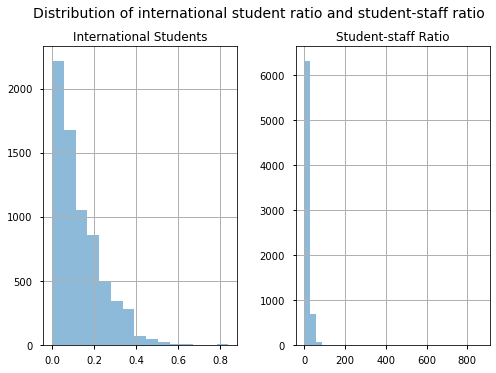

In [34]:
# check histograms for international_students and student_staff_ratio because they seemed to have extreme values based on the
# summary statistics
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of international student ratio and student-staff ratio', fontsize=14)
data.hist('international_students', bins=15, alpha=0.5, ax=axes[0],align='mid')
axes[0].set_title('International Students')
data.hist('student_staff_ratio', bins=30, alpha=0.5, ax=axes[1], align='mid')
axes[1].set_title('Student-staff Ratio')

Based on the histograms we decided to exclude those observations where the student-staff ratio was greater than or equal to 100. As for the observations where the international students ratio was high we decided to keep them as is.

In [35]:
# drop extreme values from student_staff_ratio
data = data[data['student_staff_ratio'] < 100] # there are 11 observations above 100

In [36]:
# check correlation for numeric variables
to_drop = set(data.columns) - {'year', 'f_num_students', 'f_student_staff_ratio', 'f_international_students'}
data[list(to_drop)].corr()

,international_students,male_percentage,total_score,international_score,world_rank,student_staff_ratio,teaching_score,num_students,citations_score,research_score,income_score,female_percentage
international_students,1.000000,-0.109589,0.527437,0.824787,-0.509589,-0.052401,0.369315,-0.155206,0.434029,0.438664,0.109711,0.109589
male_percentage,-0.109589,1.000000,-0.058678,-0.245720,0.082607,-0.115196,0.081630,-0.148513,-0.169920,0.044670,0.300574,-1.000000
total_score,0.527437,-0.058678,1.000000,0.563429,-0.898375,-0.073602,0.867802,-0.012357,0.868047,0.912394,0.361561,0.058678
international_score,0.824787,-0.245720,0.563429,1.000000,-0.558210,0.053912,0.297265,-0.085695,0.530699,0.422435,0.099903,0.245720
world_rank,-0.509589,0.082607,-0.898375,-0.558210,1.000000,0.005872,-0.711278,0.019070,-0.847865,-0.766845,-0.317347,-0.082607
student_staff_ratio,-0.052401,-0.115196,-0.073602,0.053912,0.005872,1.000000,-0.188298,0.271165,-0.010099,-0.070777,0.007262,0.115196
teaching_score,0.369315,0.081630,0.867802,0.297265,-0.711278,-0.188298,1.000000,0.018930,0.556468,0.913441,0.382307,-0.081630
num_students,-0.155206,-0.148513,-0.012357,-0.085695,0.019070,0.271165,0.018930,1.000000,-0.041039,0.032474,-0.045647,0.148513
citations_score,0.434029,-0.169920,0.868047,0.530699,-0.847865,-0.010099,0.556468,-0.041039,1.000000,0.611628,0.163976,0.169920
research_score,0.438664,0.044670,0.912394,0.422435,-0.766845,-0.070777,0.913441,0.032474,0.611628,1.000000,0.442840,-0.044670


From the correlation matrix we can tell that among the 5 "pillars" of the world rank which comprise the total_score, the citation_score is the one that has the strongest negative correlation with a university's rank: not only doing research is important but how effective and far-reaching the findings are. Besides some obvious strong relations (e.g. teaching_score and research_score, num_students and student_staff_ratio (the more students the higher the student_staff ratio, etc), an interesting point is a moderate correlation between the gender ratios and income_score: with the female_percentage the extent to which businesses are willing to pay for a university's research is negatively correlated whilst the same for male_percentage it positively correlated with the willingness of funding. This might be the result of male students' prevalence in Science, Technology, Engineering and Mathematics programs.

Text(0.5, 1.0, 'Number of ranked universities between 2011 and 2020')

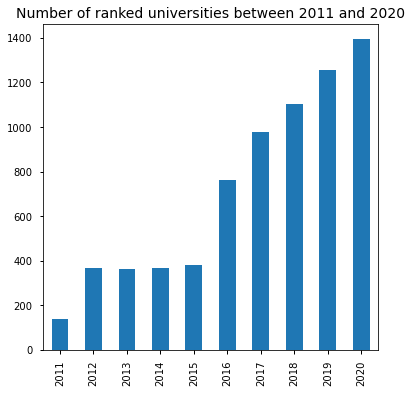

In [45]:
# check the number of ranked universities over the years
data_bar = data.groupby('year')['world_rank'].count()
data_bar.plot(kind='bar', figsize=(6,6), xlabel='').set_title('Number of ranked universities between 2011 and 2020', fontsize=14)

From this dataset we can see that the number of universities were the same for 3 consecutive years (2012-2014), and it is steadily increasing since 2015 with about the same number in each year (around 100 as read from the graph). Within the timespan of 10 years, the number of universities grew more than sevenfold.

Text(0.5, 0, '')

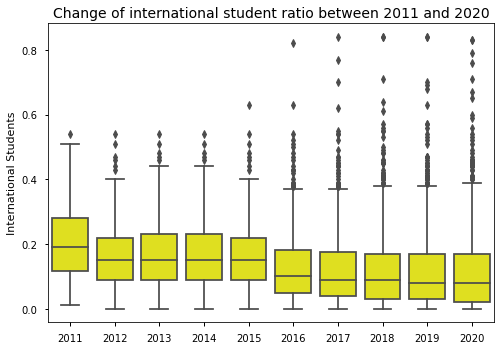

In [44]:
# check the ratio of international students over the years
sns.boxplot(data=data,x='year', y='international_students', color = 'yellow').set_title('Change of international student ratio between 2011 and 2020', fontsize=14)
plt.ylabel('International Students')
plt.xlabel('')

Although the mean of the international student ratio is decreasing, since 2015 there is a growing number of universities where they open programmes and courses for international students. This might also mean that there is an increase in the English language courses offered and accessible to anyone (true mainly outside of English speaking countries).

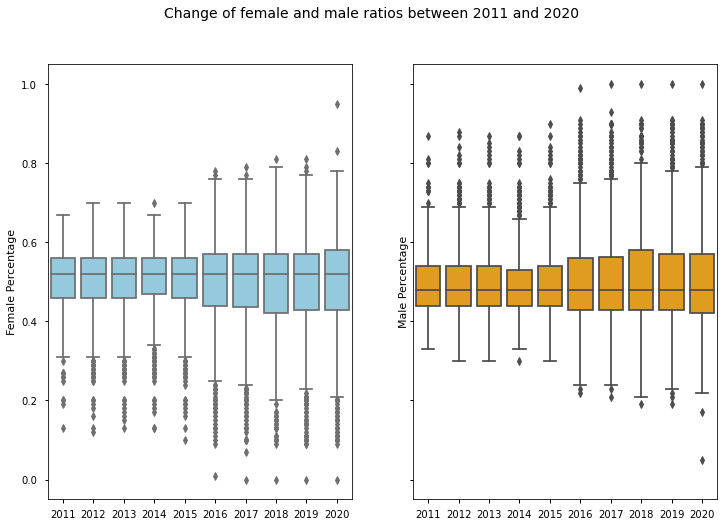

In [43]:
# check female and male percentages over the years 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8), sharey = True)
fig.suptitle('Change of female and male ratios between 2011 and 2020', fontsize=14)
sns.boxplot(x="year", y='female_percentage', data=data, orient='v', color='skyblue', ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Female Percentage')
sns.boxplot(x="year", y='male_percentage', data=data, orient='v', color='orange', ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Male Percentage')
plt.show()

The gender ratios got higher maximums and lower minimums over the years, but the main difference between the two genders is that the male ratio is always higher for the majority of universities and it hasn't changed over the years.

In [46]:
# export data to csv
data.to_csv('ranking.csv', encoding = 'utf-8', index=False)

<h1><code style="background:indigo;color:white">API Data</h1></code>
<hr>

## 1. Description of Data
* ##### Source:
The data that we use for enrichment purposes is acquired through the API of the [Nobel Prize website](https://www.nobelprize.org/). Detailed documentation about the API can be found on [this](https://app.swaggerhub.com/apis/NobelMedia/NobelMasterData/2#/default/get_laureates) website.
* ##### About:
The data that we collect with the help of the API contains information about every Nobel Prize Laureate. The Nobel Prize was first awarded in 1901, therefore we have data about the Laureates since that year up until 2020. Our aim is to join this data with the university ranking dataset on the names of universities where Nobel Prize Laureates worked or carried out research. This way we can investigate the connection between top universities and Nobel Prize winners.
* ##### Variables:
The variables that we extract from the response of the get request are the following:
|Variable Name|Type|Description|
|:-:|:-:|:-|
|id|Qualitative, nominal|ID of Nobel Prize Laureate.|
|gender|Qualitative, nominal|Gender of Nobel Prize Laureate.|
|birth_date|Quantitative, interval|Birth year of Nobel Prize Laureate.|
|birth_place|Qualitative, nominal|Birth country of Nobel Prize Laureate.|
|award_year|Quantitative, interval|Year when Nobel Prize Laureate was awarded the Nobel Prize.|
|portion|Quantitative, ratio|An integer indicating the number of Nobel Prize Laureates among who the Prize was shared.|
|prize_amount|Quantitative, ratio|Amount of Prize for the Nobel Prize in SEK adjusted to its value in 2019.|
|category|Qualitative, nominal|Nobel Prize category in which Nobel Prize Laureate was awarded.|
|university|Qualitative, nominal|Name of university where Nobel Prize Laureate worked or did research.|
|university_country|Qualitative, nominal|Country of university where Nobel Prize Laureate worked or did research.|

 ## 2. Collect Data with API and Transform it for Further Analysis

##### Send Request to Collect Data

In [47]:
# loop to collect all Nobel Prize Laureates between 1901 and 2020
nobel_json_list = []

for year in range(1901, 2021):
    nobel_url = 'http://api.nobelprize.org/2.0/laureates?nobelPrizeYear={}'.format(year)
    resp = requests.get(nobel_url)
    nobel_json = json.loads(resp.text)
    nobel_json_list.append(nobel_json)

##### Parse Response and Save it to a Data Frame

In [48]:
# check the keys of an item in the list of responses
# we only want to keep values that belong to the 'laureates' key
nobel_json_list[0].keys()

dict_keys(['laureates', 'meta', 'links'])

In [49]:
# check the keys for one laureate in a year
# we only want to keep 'id', 'knownName', 'gender', 'birth' and 'nobelPrizes'
nobel_json_list[0]['laureates'][0].keys()

dict_keys(['id', 'knownName', 'givenName', 'familyName', 'fullName', 'gender', 'birth', 'death', 'wikipedia', 'wikidata', 'sameas', 'links', 'nobelPrizes'])

In [50]:
# extract the needed keys and values from the dictionaries that belong to laureates to a data frame
extracted_df = pd.DataFrame()
for i in range(0, len(nobel_json_list)):
    temp_df = pd.DataFrame(nobel_json_list[i]['laureates'], columns=['id', 'knownName', 'gender', 'birth', 'nobelPrizes'])
    extracted_df = extracted_df.append(temp_df, ignore_index=True)

In [51]:
extracted_df.head(5)

,id,knownName,gender,birth,nobelPrizes
0,293,"{'en': 'Emil von Behring', 'se': 'Emil von Beh...",male,"{'date': '1854-03-15', 'place': {'city': {'en'...","[{'awardYear': '1901', 'category': {'en': 'Phy..."
1,463,"{'en': 'Frédéric Passy', 'se': 'Frédéric Passy'}",male,"{'date': '1822-05-20', 'place': {'city': {'en'...","[{'awardYear': '1901', 'category': {'en': 'Pea..."
2,462,"{'en': 'Henry Dunant', 'se': 'Henry Dunant'}",male,"{'date': '1828-05-08', 'place': {'city': {'en'...","[{'awardYear': '1901', 'category': {'en': 'Pea..."
3,160,"{'en': 'Jacobus H. van 't Hoff', 'se': 'Jacobu...",male,"{'date': '1852-08-30', 'place': {'city': {'en'...","[{'awardYear': '1901', 'category': {'en': 'Che..."
4,569,"{'en': 'Sully Prudhomme', 'se': 'Sully Prudhom...",male,"{'date': '1839-03-16', 'place': {'city': {'en'...","[{'awardYear': '1901', 'category': {'en': 'Lit..."


##### Transform and Filter the Data Frame

In [52]:
# remove observations where knownName is missing because these belong to organisations and we are only interested in people
# furthemore there is no corresponding university in case of organisations and we need that for the join with the university
# ranking table
extracted_df = extracted_df[extracted_df['knownName'].notna()].reset_index(drop=True)

In [53]:
# there is one laureate where the 'birth' information is missing
# we fill this in manually
extracted_df[extracted_df['birth'].isna()]

,id,knownName,gender,birth,nobelPrizes
929,986,"{'en': 'Michael Houghton', 'se': 'Michael Houg...",male,NaN,"[{'awardYear': '2020', 'category': {'en': 'Phy..."


In [54]:
# fill in missing value from Wikipedia: https://en.wikipedia.org/wiki/Michael_Houghton_(virologist)
extracted_df.at[929, 'birth'] = {'date': '1949-01-01'}

In [55]:
# extract the dictionaries from the lists in the nobelPrizes column and save it in the same column
# this way we can parse the dictionaries in the next step
extracted_df['nobelPrizes'] = [extracted_df['nobelPrizes'][i][0] for i in range(0, len(extracted_df))]

In [56]:
# extract dictionaries and create new variables from their contents
to_extract = ['knownName', 'birth', 'nobelPrizes']
for column in to_extract:
    temp_df = pd.json_normalize(extracted_df[column])
    extracted_df = extracted_df.join(temp_df, rsuffix = "_" + column)

In [57]:
extracted_df.head(1)

,id,knownName,gender,birth,nobelPrizes,en,se,no,date,place.city.en,...,motivation.se,links.rel,links.href,links.action,links.types,dateAwarded,residences,motivation.no,topMotivation.en,topMotivation.se
0,293,"{'en': 'Emil von Behring', 'se': 'Emil von Beh...",male,"{'date': '1854-03-15', 'place': {'city': {'en'...","{'awardYear': '1901', 'category': {'en': 'Phys...",Emil von Behring,Emil von Behring,NaN,1854-03-15,Hansdorf,...,för hans arbete rörande serumterapien och särs...,nobelPrize,https://api.nobelprize.org/2/nobelPrize/med/1901,Get,application/json,NaN,NaN,NaN,NaN,NaN


In [58]:
# drop columns with dictionaries
extracted_df = extracted_df.drop(['knownName', 'birth', 'nobelPrizes'], axis = 1)

In [59]:
# select variables to keep
filtered_df = extracted_df[['id', 'gender', 'en', 'date', 'place.countryNow.en', 'awardYear', 'portion', 'prizeAmountAdjusted', 'affiliations', 'category.en']]

In [60]:
# replace nan values with 'missing' so that we can still use those observations for some exploratory charts
filtered_df = filtered_df.fillna(value={'affiliations': 'missing'})

In [61]:
# extract dictionaries from list in the affiliations column
filtered_df['affiliations'] = [filtered_df['affiliations'][i][0] for i in range(0, len(filtered_df))]

In [62]:
# extract variables from dictionary in affiliations column to a new dataframe
aff_df = pd.DataFrame()
for row in range(0, len(filtered_df)):
    if len(filtered_df['affiliations'][row]) == 1: # if the value is 'm' (=missing) then go to the next row
        next
    else: 
        temp_df = pd.json_normalize(filtered_df['affiliations'][row])
        index = pd.DataFrame({'id': [filtered_df['id'][row]]}) # get id of laureate so that we can join it back later
        aff_df = aff_df.append(temp_df.join(index), ignore_index=True)

In [63]:
# choose columns to keep from the affiliations and join them to the filtered_df to create a new df
nobel_df = pd.merge(filtered_df, aff_df[['id', 'nameNow.en', 'countryNow.en']], on = 'id', how = 'left')

In [64]:
# drop affiliations column and rename variables
nobel_df = nobel_df.drop(['affiliations'], axis = 1)
nobel_df.rename(columns={'en': 'name', 'date': 'birth_date', 'place.countryNow.en': 'birth_place', 'awardYear': 'award_year', 'prizeAmountAdjusted': 'prize_amount', 'category.en': 'category', 'nameNow.en': 'university', 'countryNow.en': 'university_country'}, inplace=True)

In [65]:
# save df to csv
nobel_df.to_csv('nobel.csv', encoding = 'utf-8', index=False)

## 3. Exploratory Data Analysis

##### Import Data

In [66]:
# import df from csv
nobel_df = pd.read_csv('nobel.csv')

In [67]:
nobel_df.head(2)

,id,gender,name,birth_date,birth_place,award_year,portion,prize_amount,category,university,university_country
0,293,male,Emil von Behring,1854-03-15,Poland,1901,1,8722510,Physiology or Medicine,Marburg University,Germany
1,463,male,Frédéric Passy,1822-05-20,France,1901,1/2,8722510,Peace,NaN,NaN


##### Check Data Types

In [68]:
nobel_df.dtypes

id                     int64
gender                object
name                  object
birth_date            object
birth_place           object
award_year             int64
portion               object
prize_amount           int64
category              object
university            object
university_country    object
dtype: object

There are two variables where the data types are incorrect and need to be fixed. These are the birth_date which is stored as a string and the portion which is also stored as a string.

In [69]:
# extract year from birth_date and convert it to integer
nobel_df['birth_date'] = nobel_df['birth_date'].apply(lambda x: int(x.split('-')[0]))

In [70]:
# add new column with age at award
nobel_df['age_at_award'] = nobel_df['award_year'] - nobel_df['birth_date']

In [71]:
# define function to convert portion from string to integer
def portion_int(row):
    if len(row['portion']) == 1:
        portion = int(row['portion'])
    else:
        portion = int(row['portion'].split('/')[1])
        
    return portion

In [72]:
# apply function
nobel_df['portion'] = nobel_df.apply(lambda x: portion_int(x), axis=1)

In [73]:
# add new column with actual prize amounts
nobel_df['prize_amount_actual'] = nobel_df['prize_amount'] / nobel_df['portion']

##### Check for Duplicates and Missing Values

In [74]:
# check if there are duplicates
nobel_df.duplicated().sum()

10

There are 10 duplicates in the data, we drop them.

In [75]:
# drop duplicated rows
nobel_df.drop_duplicates(inplace=True)

In [76]:
# check missing values by variables
nobel_df.isnull().sum()

id                       0
gender                   0
name                     0
birth_date               0
birth_place              1
award_year               0
portion                  0
prize_amount             0
category                 0
university             227
university_country     231
age_at_award             0
prize_amount_actual      0
dtype: int64

In [77]:
# look up the laureate for who the birth_place is missing
nobel_df[nobel_df['birth_place'].isnull()==True]

,id,gender,name,birth_date,birth_place,award_year,portion,prize_amount,category,university,university_country,age_at_award,prize_amount_actual
935,986,male,Michael Houghton,1949,NaN,2020,3,10000000,Physiology or Medicine,University of Alberta,Canada,71,3.333333e+06


In [78]:
# fill it in manually to avoid losing this observation
# source: https://en.wikipedia.org/wiki/Michael_Houghton_(virologist)#Early_life_and_education
nobel_df['birth_place'] = np.where(nobel_df['birth_place'].isnull(), 'United Kingdom', nobel_df['birth_place'])

As for the observations where the university or the country of the university is missing we decided not to drop them. This is because we would have liked to see some information about all the Nobel Prize Laureates along a few variables such as gender and place of birth which are not affected by the missing values. However, later on when we joined the university rankings table with the Nobel Prize table we had to exclude these observations since we joined on the 'university' column.

Then we checked some features of the Laureates for who the university was missing. It turned out that the vast majority of them were awarded in either the Literature or the Peace categories. As for the distribution of their birth dates the range is relatively large but based on the third quartile we can say that most of them were born before 1930.

In [79]:
# check features of laureates for who the university is missing
# check the categories in which they were awarded
nobel_missing = nobel_df[nobel_df['university'].isnull()==True]
nobel_missing['category'].value_counts()

Literature                117
Peace                     103
Chemistry                   2
Physics                     2
Economic Sciences           2
Physiology or Medicine      1
Name: category, dtype: int64

In [80]:
# check the distribution of their birth dates
nobel_missing['birth_date'].describe()

count     227.000000
mean     1899.568282
std        38.161840
min      1817.000000
25%      1866.500000
50%      1902.000000
75%      1931.000000
max      1997.000000
Name: birth_date, dtype: float64

##### Describe Data

In [81]:
# summary of string columns
nobel_df.describe(include=[object])

,gender,name,birth_place,category,university,university_country
count,930,930,930,930,703,699
unique,2,930,82,6,310,27
top,male,Edward Tatum,USA,Physiology or Medicine,University of California,USA
freq,873,1,279,222,34,362


Based on the summary statistics we can say that the majority of Laureates are men. Out of the 930 observations 873 are men. A large portion of Laureates were born in the United States and in general they come from 82 countries. Furthermore, there are six Nobel Prize categories out of which the one for Physiology and Medicine has been awarded the most times. As for the universities we have 310 distinct values, however these are located in 'only' 27 countries.

Text(0.5, 0, 'Prize Amount Actual')

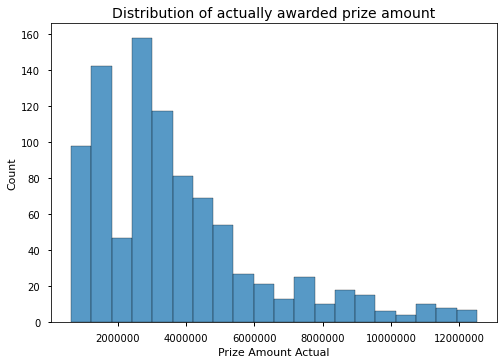

In [82]:
# histogram for prize amount actual
sns.histplot(data=nobel_df, x="prize_amount_actual").set_title('Distribution of actually awarded prize amount', fontsize=14)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Prize Amount Actual')

The distribution of the actual prize amount - the share of the total prize that a Laureate was actually given - is skewed with a long right tail. This means that the majority was awarded smaller while the minority larger prizes. A reason for this could be that in case a prize is won by multiple people then the prize is split among them, therefore the actual prize amount is smaller.

Text(0.5, 0, 'Age at Award')

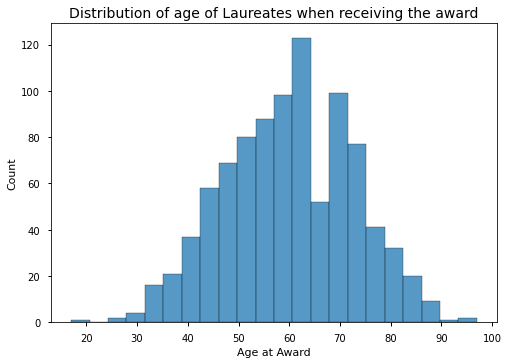

In [84]:
# histogram for age at award
sns.histplot(data=nobel_df, x="age_at_award").set_title('Distribution of age of Laureates when receiving the award', fontsize=14)
plt.xlabel('Age at Award')

The age of Laureates when they received the Nobel Prize follows a relatively normal distribution. Interestingly, there are Laureates who are very young and also who are very old.

In [85]:
# check minimum values of year variables and portion
nobel_df[["birth_date", "award_year", "portion"]].min()

birth_date    1817
award_year    1901
portion          1
dtype: int64

In [86]:
# check maximum values of year variables and portion
nobel_df[["birth_date", "award_year", "portion"]].max()

birth_date    1997
award_year    2020
portion          4
dtype: int64

The Nobel Prize was first awarded in 1901. The oldest Laureate was born in 1817, while the youngest was born in 1997. The maximum number of people among who a prize has been split is 4.

In [87]:
# check the number of awarded prizes by category
nobel_df['category'].value_counts()

Physiology or Medicine    222
Physics                   215
Chemistry                 183
Literature                117
Peace                     107
Economic Sciences          86
Name: category, dtype: int64

The number of Laureates in each category is relatively similar except for Economic Sciences where it is lower. This is because that category only exists since 1968.

Text(0.5, 0, 'Category')

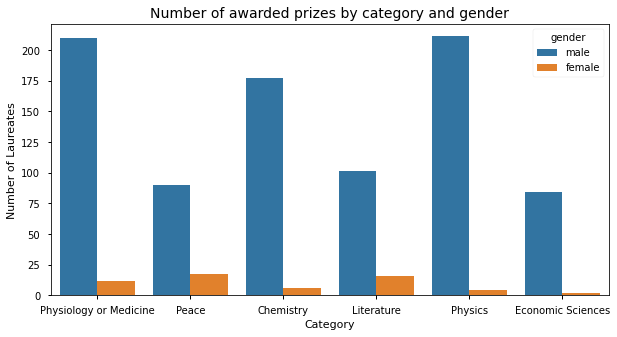

In [88]:
# barchart about the number of awarded prizes by category distributed between genders
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=nobel_df, x='category', hue='gender').set_title('Number of awarded prizes by category and gender', fontsize=14)
plt.ylabel('Number of Laureates')
plt.xlabel('Category')

If we look at the distribution of gender by category we can see that there are way more men in all of the catgories than women. The two categories where the number of women is somewhat higher are Peace and Literature.

In [89]:
# export df to csv
nobel_df.to_csv('nobel2.csv', encoding = 'utf-8', index=False)

<h1><code style="background:indigo;color:white">Joined Data</h1></code>
<hr>

## 1. Join Tables

In [90]:
# import data
ranking = pd.read_csv('ranking.csv')
nobel = pd.read_csv('nobel2.csv')

In [91]:
# filter observations where university is missing in the Nobel Prize table
nobel = nobel.dropna(subset=['university'])

In [92]:
# replace ' University' and 'University of ' with '' to find more matches in ranking df
ranking['uni'] = ranking['university_name'].apply(lambda x: x.replace(' University','')).apply(lambda x: x.replace('University of ',''))

In [93]:
# replace ' University' and 'University of ', plus a few extra endings with '' to find more matches in nobel df
nobel['uni'] = nobel['university'].apply(lambda x: x.replace(' University','')).apply(lambda x: x.replace('University of ','')).apply(lambda x: x.replace(' (MIT), Center for Cancer Research','')).apply(lambda x: x.replace(' (MIT)','')).apply(lambda x: x.replace(' (Caltech)',''))

In [94]:
# merge df-s
df = pd.merge(ranking, nobel, on='uni', how='inner')

In [95]:
# check the number of universities in the ranking table
len(ranking['university_name'].unique())

1524

In [96]:
# check the number of universities in the Nobel table
len(nobel['university'].unique())

310

In [97]:
# check the number of universities that remain
len(df['university'].unique())

99

In [98]:
# check the number of laureates who were not matched
len(nobel['name'].unique()) - len(df['name'].unique())

376

In [99]:
# check the number of laureates who were matched
len(df['name'].unique())

327

Having merged the two tables there are 99 different universities and 327 Laureates left. The number of unmatched Laureates is 376, therefore we can conclude that around half of them worked at top universities.

## 2. Answer Questions

In [100]:
# import Bokeh and plotly for interactive plots
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()
import plotly.express as px
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

Loading BokehJS ...

### 2.1 Does average age of Laureates differ for Nobel Prize categories?

##### Data Transformation

In [101]:
# get average age by category
age_by_cat = df.groupby('category').agg({'age_at_award':'mean'})
age_by_cat['age_at_award'] = age_by_cat['age_at_award'].round(decimals = 1)
age_by_cat.head()

,age_at_award
category,
Chemistry,59.4
Economic Sciences,65.5
Peace,56.7
Physics,55.8
Physiology or Medicine,57.9


##### Plotting

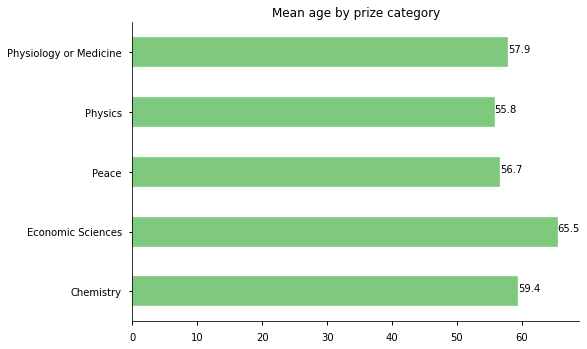

In [102]:
x = ['Physiology or Medicine','Physics','Peace','Economic Sciences','Chemistry']
y = age_by_cat['age_at_award'].tolist()

ax = age_by_cat.plot(kind='barh', 
                    title='Mean age by prize category', 
                    color = ['#7fc97f'],
                    edgecolor='white',
                    legend = False)
ax.set(ylabel='')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
    
plt.show()

Based on the joined sample data, this bar chart confirms that there is some difference among Nobel-prize categories: Economic Sciences Laureates are the oldest on average (66.5 years old) while the youngest Laureates are from the field of Physics (55.8 years old).

### 2.2 What is the distribution of prize amount by category?

##### Data Transformation

In [103]:
# import the complete Nobel Prize data again
q2_df = pd.read_csv('nobel2.csv')

##### Plotting

In [108]:
# draw boxplot
fig = px.box(q2_df,
             x="category",
             y="prize_amount_actual",
             title='Distribution of prize amount by category',
             labels={
                     "prize_amount_actual": "Actual Prize Amount",
                     "category": "Category"
                 },
             hover_data=["name"])
fig.show()

We wanted to find out whether there is a significant difference regarding the prize amount by categories. In the boxplot above we can see that the means are relatively close to each other. The one category which stands out to some extent is Literature where the third quartile is around 8.5 million SEK. A possible reason for this can be that the Literature prize was awarded less times than the rest. If we look back at the Exploratory Data Analysis section of the API data we can see that it was actually awarded fewer times than Physiology or Medicine, Chemistry and Physics. A further reason could be that it is less common for the Literature prize to be shared between multiple Laureates which makes the amounts higher.

### 2.3 What is the relationship between a university's total score and its student-staff ratio?

##### Data Transformation

In [109]:
# create df for plotting
q1_df = df.groupby(['year', 'university']).agg({'total_score':'mean', 'student_staff_ratio':'mean', 'num_students':'mean'}).reset_index()

##### Plotting

In [110]:
# create interactive plot between 2017 and 2020
p = figure( plot_width=600, plot_height=400)
p.title.text = "Pattern of associtation between total score and student-staff ratio"

### 2020
df_2020 = q1_df[q1_df['year']==2020]
source = ColumnDataSource(df_2020)

# add regression line
x=np.array(df_2020['total_score'])
y=np.array(df_2020['student_staff_ratio'])

par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
y_predicted = [slope*i + intercept  for i in x]

p.line(x,y_predicted,color='#a6611a', legend_label='2020')

# add scatter plot
p.scatter(x= 'total_score',
          y='student_staff_ratio',
          color='#a6611a', 
          alpha=0.8, legend_label='2020',
          muted_color='#a6611a', 
          muted_alpha=0.2,
          marker='circle', size=15,
          name = "scatter",
          source = source)


### 2019
df_2019 = q1_df[q1_df['year']==2019]
source = ColumnDataSource(df_2019)

# add regression line
x=np.array(df_2019['total_score'])
y=np.array(df_2019['student_staff_ratio'])

par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
y_predicted = [slope*i + intercept  for i in x]

p.line(x,y_predicted,color='#dfc27d', legend_label='2019')

# add scatter plot
p.scatter(x= 'total_score',
          y='student_staff_ratio',
          color='#dfc27d', 
          alpha=0.8, legend_label='2019',
          muted_color='#dfc27d', 
          muted_alpha=0.2,
          marker='circle', size=15,
          name = "scatter",
          source = source)

### 2018
df_2018 = q1_df[q1_df['year']==2018]
source = ColumnDataSource(df_2018)

# add regression line
x=np.array(df_2018['total_score'])
y=np.array(df_2018['student_staff_ratio'])

par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
y_predicted = [slope*i + intercept  for i in x]

p.line(x,y_predicted,color='#80cdc1', legend_label='2018')

# add scatter plot
p.scatter(x= 'total_score',
          y='student_staff_ratio',
          color='#80cdc1', 
          alpha=0.8, legend_label='2018',
          muted_color='#80cdc1', 
          muted_alpha=0.2,
          marker='circle', size=15,
          name = "scatter",
          source = source)

### 2017
df_2017 = q1_df[q1_df['year']==2017]
source = ColumnDataSource(df_2017)

# add regression line
x=np.array(df_2017['total_score'])
y=np.array(df_2017['student_staff_ratio'])

par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
y_predicted = [slope*i + intercept  for i in x]

p.line(x,y_predicted,color='#018571', legend_label='2017')

# add scatter plot
p.scatter(x= 'total_score',
          y='student_staff_ratio',
          color='#018571', 
          alpha=0.8, legend_label='2017',
          muted_color='#018571', 
          muted_alpha=0.2,
          marker='circle', size=15,
          name = "scatter",
          source = source)

# set tooltip
hover = HoverTool(names=["scatter"], tooltips=[("Name", "@university"),
                            ('Total Score', '@total_score'),
                            ('Student-Staff Ratio', '@student_staff_ratio'),
                            ('Number of Students', '@num_students')])
p.add_tools(hover)

# set axis labels, legend position and click policy
p.xaxis.axis_label = 'Total Score'
p.yaxis.axis_label = 'Student Staff Ratio'
p.legend.location = "top_right"
p.legend.click_policy="hide"

show(p)

In this question our aim was to find out whether a top university with a lower student-staff ratio has a higher total score. Based on the plot above we can conclude that this is indeed the case. On the plot we can see the values for four consecutive years and the pattern is the same for all of them. The reason for this is probably that if the student-staff ratio is lower then the teachers can give more attention to students which helps them perform better and as a result the university gets a higher total score which places it higher in the ranking. There is one outlier university: University of Bonn where the student-staff ratio is unusually high, however it still has a total score of around 60 out of 100.

### 2.4 Is there a positive relationship between total score and number of Nobel Prize Laureates?

##### Data Transformation

In [111]:
# filter df for 2020
only_2020 = df[df['year']==2020]

In [112]:
# get number of laureates by university
by_year = only_2020.groupby(['year','university_name', 'total_score']).size().reset_index(name='nb_laureates')
by_year.head(2)

,year,university_name,total_score,nb_laureates
0,2020,Aarhus University,60.3,1
1,2020,Australian National University,72.1,2


##### Plotting

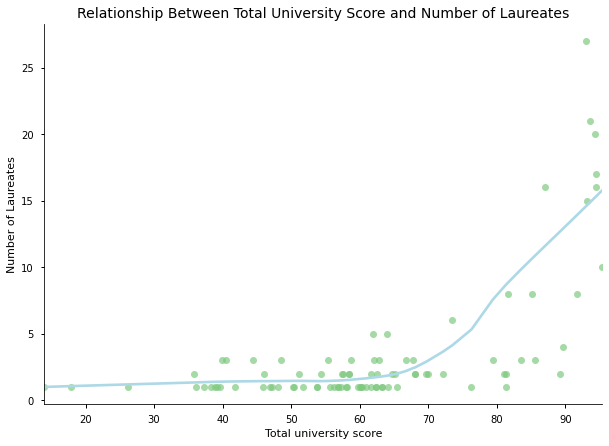

In [113]:
# create plot
# set size
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)

sns.regplot(x="total_score", y="nb_laureates", data=by_year, lowess=True, scatter_kws = {'color': '#7fc97f', 'alpha': 0.7}, line_kws={"color": "lightblue"})

#labels
ax1.set_xlabel('Total university score')
ax1.set_ylabel('Number of Laureates')
ax1.set_title('Relationship Between Total University Score and Number of Laureates', fontsize=14)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

Originally we expected a growing trend between the university total score and the number of affiliated Laureates, and this graph shows that it is not a linear relationship, but an increasing one indeed. It seems that above score 60, there are less universities and more laureates (more than 5 per uni). The number of laureates jumps actually when the university score is higher than 85. We should think about other influencing factors, for instance number of students at a certain university since that increases the chances and also internationality can positively affect the number of laureates.

### 2.5 Which are the top 5 universities based on awarded prize amount?

##### Data Transformation

In [114]:
# calculate total prize amount by university
prize_per_table = only_2020.groupby('university_name')['prize_amount_actual'].sum().sort_values(ascending=False).reset_index(name='prize_per_uni').head(5)

# round sum
prize_per_table['prize_per_uni'] = prize_per_table['prize_per_uni'].round(decimals = 1)

prize_per_table

,university_name,prize_per_uni
0,Harvard University,75232328.4
1,Massachusetts Institute of Technology,68108941.7
2,Columbia University,66244610.7
3,Stanford University,65229082.6
4,Princeton University,63544736.6


In [115]:
# get top 5 ranked universities in 2020
rank_2020 = ranking[ranking['year']==2020]
rank_per_table = rank_2020.iloc[:, : 2].head()
rank_per_table

,world_rank,university_name
3480,1,University of Oxford
3481,2,California Institute of Technology
3482,3,University of Cambridge
3483,4,Stanford University
3484,5,Massachusetts Institute of Technology


In [116]:
# join the two tables
df2 = pd.merge(rank_per_table, prize_per_table, on='university_name',how='right')

# sort based on sum of prize amount
df2 = df2.sort_values(by = 'prize_per_uni', ascending=False).reset_index(drop=True)

# replace nan with 'not in top 5'
df2['world_rank'] = np.where(df2['world_rank'].isnull()==True, 'Not in Top 5', df2['world_rank'])

df2

,world_rank,university_name,prize_per_uni
0,Not in Top 5,Harvard University,75232328.4
1,5.0,Massachusetts Institute of Technology,68108941.7
2,Not in Top 5,Columbia University,66244610.7
3,4.0,Stanford University,65229082.6
4,Not in Top 5,Princeton University,63544736.6


##### Plotting

In [118]:
# create horizontal bar chart
p = figure(plot_width=600, plot_height=400, y_range=df2["university_name"])
p.title.text = 'Hover over bars to see rank of university'

source = ColumnDataSource(df2)

p.hbar(y='university_name',
       alpha=0.9,
       line_color='white', fill_color=factor_cmap('university_name', palette=Spectral6, factors=df2['university_name']),
       right="prize_per_uni", height=0.5, source=source)

p.xaxis.formatter.use_scientific = False

hover = HoverTool(tooltips=[("prize per university (SEK)", "@prize_per_uni"),
                           ("world rank", "@world_rank")])

p.add_tools(hover)
p.xaxis.axis_label = 'Total Prize Amount Won by Laureates'

show(p)

We analysed the last year available in the dataset (2020) since we were interested in the most recent available sum of prizes so here we see the latest ranking as well. It turned out that the top 5 universities are not the ones whose laureates won the top 5 sums. There are only 2 universities - Stanford and MIT with rankings of 4 and 5 respectively - which made it to the top 5 total prizes won. The laureates from Harvard won the most of the amount in total until 2020 in which year the university ranked "only" 7th in the world list.

### 2.6 Is the age at award distribution different for those Laureates who worked in their home countries as opposed to who did not?

##### Data Transformation

In [119]:
# check if country names match in joined and nobel df-s
diff = set(df['country'].unique()) - set(nobel['birth_place'].unique())
diff

{'Netherlands',
 'Russian Federation',
 'United States',
 'United States of America'}

In [120]:
# check the names of these countries in the nobel df
list([nobel[nobel['birth_place'].str.contains(r'Netherlands')]['birth_place'].unique(),
nobel[nobel['birth_place'].str.contains(r'Russia')]['birth_place'].unique(),
nobel[nobel['birth_place'].str.contains(r'USA')]['birth_place'].unique()])

[array(['the Netherlands'], dtype=object),
 array(['Russia'], dtype=object),
 array(['USA'], dtype=object)]

In [121]:
# synchronize the country names in the country and birthplace columns
df['country'] = np.where(df['country'] == 'Russian Federation', 'Russia', df['country'])
df['country'] = np.where(df['country'] == 'Netherlands', 'the Netherlands', df['country'])
df['country'] = np.where((df['country'] == 'United States') | (df['country'] == 'United States of America'), 'USA', df['country'])

In [122]:
# create column to indicate whether laureate worked in their home country or not
df['stayed'] = np.where(df['country'] == df['birth_place'], True, False)

In [123]:
# create df for plotting
q3_df = df.groupby(['name', 'stayed'])['age_at_award'].mean().reset_index().rename(columns ={0:'age_at_award'})

##### Plotting

Text(0, 0.5, 'Number of Laureates')

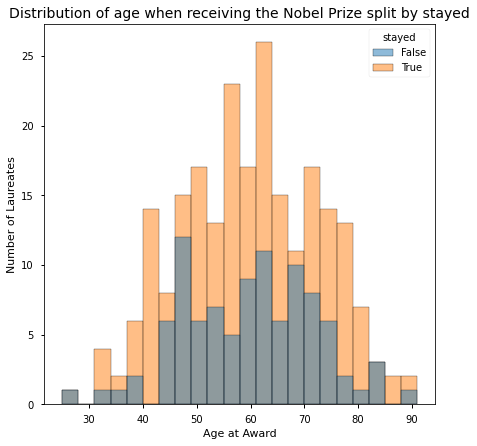

In [129]:
# create histogram
fig, ax = plt.subplots(figsize=(7,7))

sns.histplot(data=q3_df,
             x="age_at_award",
             hue='stayed', binwidth=3).set_title('Distribution of age when receiving the Nobel Prize split by stayed', fontsize=14) 
plt.xlabel('Age at Award')
plt.ylabel('Number of Laureates')

Our aim was to find out whether the age distribution when receiving the Nobel Prize is different for Laureates who had a career in their home countries compared to those who worked abroad. Our hypothesis was that those who leave their home countries might need more time to prove themselves, therefore they are older when they receive the award. Based on the joint histogram above we can say that the number of Laureates who left their home countries is lower in general than of those who did not. We can also see that among those who stayed there is a considerably higher number of Laureates with younger age while most of the Laureates who worked abroad received the award after their late forties. Therefore we can say that our hypothesis was true.